In [1]:
import pandas as pd
from scipy.stats import ks_2samp
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (25, 25)
import seaborn as sns
sns.set_style("whitegrid")

from pprint import pprint

def corr(first_file, second_file, method = 'pearson'):
    assert method in ['pearson', 'kendall', 'spearman', 'kst']
#     print('\n Relation Between : %s and %s' % (first_file,second_file))
    first_df = pd.read_csv("../models/" + first_file + "/train_meta_probs_round_0.csv")
    second_df = pd.read_csv("../models/" + second_file + "/train_meta_probs_round_0.csv")
    class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    
    if method is not 'kst':
        corrs = [first_df[class_name].corr(second_df[class_name], method=method) for class_name in class_names]
    else:
        corrs = [ks_2samp(first_df[class_name].values, second_df[class_name].values)[1] for class_name in class_names]
    return np.mean(corrs)
    
#     for class_name in class_names:
#         # all correlations
#         print('\n Class: %s' % class_name)
#         print(' Pearson\'s correlation score: %0.6f' % first_df[class_name].corr(second_df[class_name], method='pearson'))
#         print(' Kendall\'s correlation score: %0.6f' % first_df[class_name].corr( second_df[class_name], method='kendall'))
#         print(' Spearman\'s correlation score: %0.6f' % first_df[class_name].corr(second_df[class_name], method='spearman'))
#         ks_stat, p_value = ks_2samp(first_df[class_name].values, second_df[class_name].values)
#         print(' Kolmogorov-Smirnov test:    KS-stat = %.6f    p-value = %.3e\n' % (ks_stat, p_value))
#         return 

In [2]:
models = [
    # |=============================================================================================================================================|
    # |--------------------------------------------model name--------------------|-public-lb-|--notes----|--stoping metric val--|--oof training auc-|
    # |+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
    # |--singlegru
    "e-fastText-m-singlegru-o-loss-l-300-t-word_seq-a-False-k-5-d-0.5-ed-True"    #                         0.039862790185247826  0.9879125615838692|
    , "e-fastText-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True"  #                         0.03977672309395772   0.9882893395645355|
    , "e-glove-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True"     #                         0.040115497633413405  0.9877813729816268|
    , "e-glove-m-singlegru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True"     #                         0.04016299755467036   0.9880385597623101|
    , "e-fastText-m-singlegru-o-loss-l-300-t-word_seq-a-False-k-5-d-0.5-ed-True-p"# plb ??????128 gru cell  0.038780552141169385  0.9893600245500188|
    , "e-fastText-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True-p"#           192 gru cell  0.0388370676189012    0.9895150849814781|
    , "e-glove-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True-p"   # plb       168 gru cell  0.0391787786753918    0.9891835263092724|
    , "e-glove-m-singlegru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p"   #                         0.03892912565676921   0.9895949800478129|
    # |+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
    # |--dual recurrent--|--E-><SD>->BI(RNN, ret_seq=T)->D->BI(RNN, ret_seq=F)->D->Output--|--RMSprop-clip-decay--|---------------------------------|
    # |----------------------------------------------------------------fastText dual gru------------------------------------------------------------|
    , "e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False"  # plb 0.9839 64 gru cell   0.03878569178561746   0.9889575729884242|
    , "e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True"   # plb 0.9851 64 gru cell   0.038426149918624766  0.9892561512475734|
    , "e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False"   # plb 0.???? 64 gru cell   0.98896186665513916   0.9882455342187026|
    , "e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True"    # plb 0.???? 64 gru cell   0.989896769009636     0.9897833620504746|
    , 'e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p' # plb 0.9859 64 gru cell   0.037253636088823046  0.990565966361271 |
    , "e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p"  # plb 0.9860 64 gru cell   0.9909905884776145    0.99070534142237  |
    , "e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p" #            168 gru cell  0.03842620880700849   0.9896792938436768|
    # |----------------------------------------------------------------glove dual gru---------------------------------------------------------------|
    , "e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False"     # plb 0.9841 64 gru cell   0.039255329267914064  0.9889373801289936|
    , "e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True"      # plb 0.9850 64 gru cell   0.0386557071181742    0.9893335772431743|
    , "e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False"      # plb 0.???? 128gru cell   0.989346108209169     0.9885367345919317|
    , "e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True"       # plb 0.???? 128gru cell   0.9896206547636497    0.9892739761089372|
    , "e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True-p"     # plb 0.9856 64 gru cell   0.9908534271957794    0.990786235081304 |
    , "e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True-p"    # plb ?????? 64 gru cell   0.03758970025111525   0.9906057030345216|
    # |+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
    # |--recurrent with 1Dpooling--|--E-><SD>->BI(RNN, ret_seq=T)->SD->[GlobalMaxP, GlobalAvgP]->Output--|--RMSprop-clip-decay--|-------------------|
    # |---------------------------------------------------------------fastText lstmpool-------------------------------------------------------------|
    , "e-fastText-m-lstmpool-o-loss-l-300-t-word_seq-a-False-k-5-d-0.2-ed-False" # plb 0.9845 64 lstm cell  0.03930044777911534   0.9892196083891868|
    , "e-fastText-m-lstmpool-o-loss-l-300-t-word_seq-a-False-k-5-d-0.25-ed-True" # plb 0.9850 80 lstm cell  0.0384567785262458    0.989697557539166 |
    , "e-fastText-m-lstmpool-o-auc-l-300-t-word_seq-a-False-k-5-d-0.2-ed-False"  # plb 0.???? 128lstm cell  0.9895020119637422    0.9889997134668925|
    , "e-fastText-m-lstmpool-o-auc-l-300-t-word_seq-a-False-k-5-d-0.25-ed-True"  # plb 0.9852 128lstm cell  0.9900179920914309    0.9899768463714634|
    , "e-fastText-m-lstmpool-o-auc-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True-p" # plb 0.9856 128lstm cell  0.99104433784861      0.9909112194843065|
    # |--------------------------------------------------------------glove lstmpool-----------------------------------------------------------------|
    , "e-glove-m-lstmpool-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False"    # plb 0.9842 64 lstm cell  0.03948638144245002   0.9888600753905193|
    , "e-glove-m-lstmpool-o-loss-l-400-t-word_seq-a-False-k-5-d-0.1-ed-True"     # plb 0.9851 80 lstm cell  0.03894103140855342   0.9892621091382511|
    , "e-glove-m-lstmpool-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False"     # plb 0.???? 128lstm cell  0.9893154523688711    0.9888904313544685|
    , "e-glove-m-lstmpool-o-auc-l-400-t-word_seq-a-False-k-5-d-0.1-ed-True"      # plb 0.???? 144lstm cell  0.9898719661439239    0.9894176054267639|
    , "e-glove-m-lstmpool-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True-p"    # plb ?????? 64 lstm cell  0.9907883541308458    0.990685723964711 |
    # |+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
    # |--cnn with short cuts--|--E-><SD>->C(64)--(D)-->MaxP-->C(128)--(D)-->MaxP-->C(256)--(D)-->MaxP-->C(512)--(D)-->MaxP->GlobalMaxP-->Concat->Out|
    # |                                              ➘------------------ | ------------------ | ------------------ | ------>GlobalMaxP----➚        |
    # |                                                                    ➘----------------- | ------------------ | ------>GlobalMaxP----➚        |
    # |                                                                                         ➘----------------- | ------>GlobalMaxP----➚        |
    # |                                                                                                             ➘------>GlobalMaxP----➚        |
    , "e-fastText-m-1dcnn-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False"    # plb 0.9807               0.043188315885413046  0.9836396791711365|
    , "e-fastText-m-1dcnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.3-ed-False"     # plb 0.9830               0.988235068763563     0.988235068763563 |
    , "e-glove-m-1dcnn-o-auc-l-400-t-word_seq-a-False-k-5-d-0.3-ed-False"        # plb 0.98??               0.9877953425341282    0.9873732483607282|
    , "e-glove-m-1dcnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.2-ed-False"        # plb 0.9826               0.9878919343007058    0.9865766847964235|
    , "e-fastText-m-1dcnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.3-ed-False-p"   # plb 0.9840               0.9890789443415923    0.9884337987677146|
    , "e-glove-m-1dcnn-o-auc-l-400-t-word_seq-a-False-k-5-d-0.3-ed-True-p"       # plb ??????               0.9890360340313306    0.9888158140442164|
    # |+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
    # |--dpcnn--|--E-><SD>->2*C(64,3,1)-->Add-->MaxP(3,2)--?*|-->2*C(64,3,1)-->Add-->MaxP(3,2)-|--2*C(64,3,1)-->Add->GlobalMaxP-->D-->Out           |
    # |                     ➘-C(64,1,1)-➚                   |   ➘-C(64,1,1)-➚                |  ➘-C(64,1,1)-➚                                     |
    , "e-fastText-m-dpcnn-o-loss-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True"     # plb 0.9843 64*4          0.03949779248735451  0.98887277725645   |
    , "e-fastText-m-dpcnn-o-loss-l-300-t-word_seq-a-False-k-5-d-0.25-ed-True"    # plb 0.9849 64*7          0.03910091214805972  0.9892201906461567 |
    , "e-fastText-m-dpcnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.25-ed-True"     # plb 0.???? 64*7          0.9886991936560493   0.9881968321676555 |
    , "e-glove-m-dpcnn-o-loss-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True"        # plb ?????? 64*7          0.03951993416676983  0.989071832993667  |
    , "e-glove-m-dpcnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True"         # plb ?????? 64*7          0.9893404274471056   0.9892070903299696 |
    , "e-fastText-m-dpcnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.25-ed-True-p"   # plb 0.9856 64*7          0.9905350399300884   0.99010323970241   |
    # |+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
    # |--2dcnn text cnn--||
    , "e-fastText-m-2dcnn-o-auc-l-200-t-word_seq-a-False-k-5-d-0.2-ed-True-p"    # plb ?????? 1235*64       0.9892923810297234    0.9892113114497559|
    , "e-fastText-m-2dcnn-o-loss-l-200-t-word_seq-a-False-k-5-d-0.2-ed-True-p"   # plb ?????? 1235*108      0.04195351859079033   0.9886728396820114|
    , "e-fastText-m-2dcnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True-p"    # plb 0.9836 1235*128      0.9896842258947609    0.9894773948405491|
    , "e-fastText-m-2dcnn-o-loss-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True-p"   # plb ?????? 1235*128      0.04151419463192054   0.9895238687223418|
    # |+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
    # |--2dcnn followed by recurrent--|--E-><SD>->2DC(48)--Permute(1,3,2)--Reshape(1,2*3)-->BI(RNN, ret_seq=T)-->GlobalMaxP--(D)-->-Out-------------|
    , "e-fastText-m-crnn-o-loss-l-300-t-word_seq-a-False-k-5-d-0.2-ed-False"     # plb 0.9835 48cnn64gru64d 0.040599631776867345  0.9881060338118592|
    , "e-fastText-m-crnn-o-loss-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True"      # plb 0.???? 48cnn64gru64d 0.04090893583529383   0.9886722151437634|
    , "e-fastText-m-crnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.2-ed-False"      # plb 0.???? 48cnn64gru64d 0.9885823617709907    0.9880485945409619|
    , "e-fastText-m-crnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True"       # plb 0.???? 48cnn64gru64d 0.9889102087806986    0.9887448404077158|
    , "e-fastText-m-crnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True-p"     # plb 0.9844 48cnn64gru64d 0.9895966796034743    0.9892859392066509|
    # , "e-fastText-m-crnn-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False"   # plb 0.9835 48cnn64gru64d 0.040306914708962464  0.9880926706452219|
    , "e-glove-m-crnn-o-loss-l-300-t-word_seq-a-False-k-5-d-0.2-ed-False"        # plb 0.9825 48cnn64gru64d 0.0409410269935218    0.9878149085979498|
    , "e-glove-m-crnn-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False"        # plb 0.9830 48cnn64gru64d 0.04093623951785437   0.9880453818195581|
    # |------------------------------------------------------------recurrent -> 1dcnn---------------------------------------------------------------|
    , "e-fastText-m-grucnn-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True"    # plb 0.9851 128gru64cnn   0.03864121738531204   0.9897427879461199|
    , "e-fastText-m-grucnn-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True"     # plb 0.9851 128gru64cnn   0.9899513978200888    0.9898509582516019|
    , "e-fastText-m-grucnn-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True-p"   # plb 0.9854 128gru64cnn   0.990962358881309     0.9906737103012322|
    , "e-glove-m-grucnn-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True"       # plb 0.9849 128gru64cnn   0.039208610008177366  0.9894670109261301|
    , "e-glove-m-grucnn-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True"        # plb 0.???? 128gru64cnn   0.9896636145444774    0.9894648692173084|
    # |--------------------------------------------------------------tfidf log reg------------------------------------------------------------------|
    # , "log_reg-w-30000-2-c-150000-5-C-3.0-k-5"                                   # plb 0.9772                                                     |
    , "log_reg-w-None-3-c-None-6-C-4-k-5"                                        # plb 0.9778                                     0.9858867069016608|
    , "log_reg-w-None-3-c-None-6-C--1-k-5"                                       # plb 0.9786                                     0.9864928430756239|
    , "log_reg-w-25000-2-c-60000-3-C--1.0-k-5"                                   # plb 0.9774                                     0.9854785796730031|
    , "log_reg-w-None-3-c-None-6-C--1.0-k-5-p"                                   # plb 0.9803                                     0.9870013986995876|
    # , "nb_svm-w-None-3-c-None-6-C-4-k-5"                                         # plb 0.9705 bad                                                 |
    # |-----------------------------------------------------------------fm-ftrl---------------------------------------------------------------------|
    , "fm_ftrl-w-20000-3-c-50000-6"                                              # plb 0.9796                                     0.981068          |
    , "fm_ftrl-w-20000-2-c-50000-3"                                              # plb 0.9805                                     0.981923          |
    , "fm_ftrl-w-300000-2-c-60000-3-p"                                           # plb                                            0.981963+0.000888 |
    # |=============================================================================================================================================|
    ]

In [4]:
results = np.zeros((len(models), len(models)))
for i in range(len(models) - 1):
    print(i)
    for j in range(i+1, len(models)):
#         print(i, j)
        try:
            results[i, j] = corr(models[i],models[j])
        except:
            print("not possible")
results += results.T
for i in range(results.shape[0]):
    results[i,i] = 1

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 50
2 51
2 52
2 53
2 54
2 55
2 56
2 57
2 58
2 59
2 60
2 61
2 62
2 63
2 64
2 65
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17


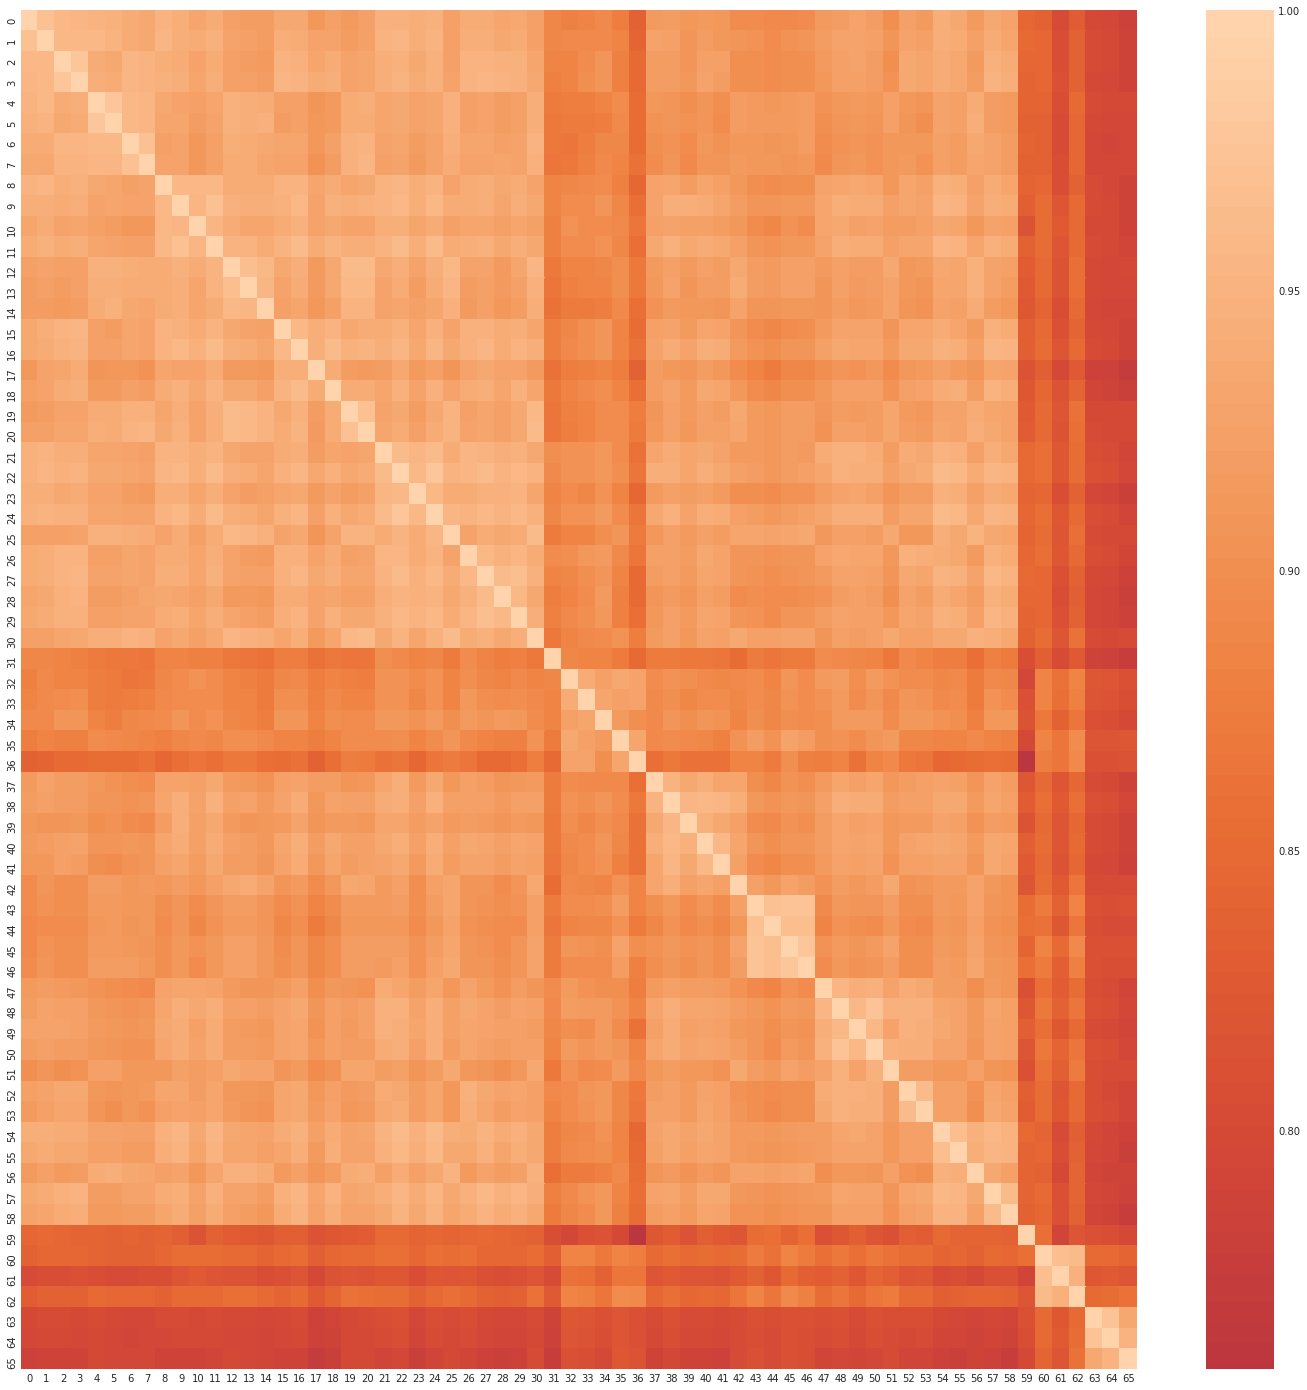

In [19]:
sns.heatmap(results,  center= 0.5)

In [16]:
sum(results < 0.95).sum()

4020

In [18]:
results.mean(axis = 1) 

array([0.91212033, 0.91608232, 0.91659262, 0.9176543 , 0.91247336,
       0.91066908, 0.9107312 , 0.90961999, 0.91818749, 0.92226517,
       0.91333582, 0.92358842, 0.91768361, 0.91482774, 0.90957792,
       0.91642569, 0.92168489, 0.90146787, 0.91391664, 0.91588304,
       0.9170911 , 0.92280739, 0.92782148, 0.91342929, 0.92658622,
       0.91874445, 0.91933502, 0.91922354, 0.91229181, 0.91774398,
       0.9197521 , 0.87084555, 0.89011975, 0.89203749, 0.89559507,
       0.89150069, 0.86500276, 0.90672888, 0.91442374, 0.90518556,
       0.91321662, 0.90812832, 0.90586822, 0.90406968, 0.89793982,
       0.90673183, 0.90546732, 0.90618729, 0.91709339, 0.91312165,
       0.91484045, 0.90745876, 0.91147582, 0.9101278 , 0.91910055,
       0.91689734, 0.90988516, 0.9189651 , 0.91343873, 0.83274485,
       0.85886845, 0.82667829, 0.85766928, 0.8116501 , 0.8089211 ,
       0.80255338])

['e-fastText-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 'e-glove-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 'e-fastText-m-singlegru-o-loss-l-300-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 'e-glove-m-singlegru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p']


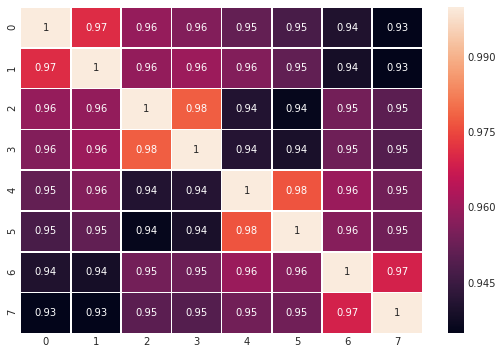

In [71]:
plt.rcParams['figure.figsize'] = (9,6)
pprint([models[i] for i in [1,2,4,7]])
sns.heatmap(results[:8, :8], annot=True,  linewidths=.5)

['0-e-fastText-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '1-e-glove-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '2-e-fastText-m-singlegru-o-loss-l-300-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '3-e-glove-m-singlegru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '4-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '5-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '6-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '7-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '8-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p',
 '9-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p',
 '10-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p']


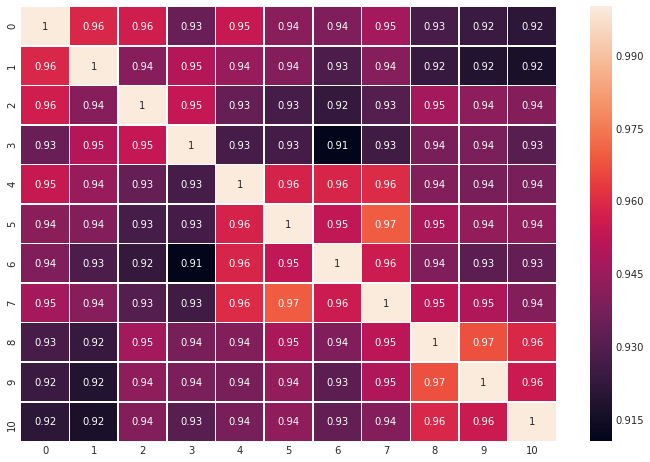

In [74]:
plt.rcParams['figure.figsize'] = (12,8)
indices = [1,2,4,7] + list(range(8,15))
pprint(list(map(lambda x: "-".join([str(e) for e in x]), zip(range(len(indices)),[models[i] for i in indices]))))
sns.heatmap(results[indices][:,indices], annot=True,  linewidths=.5)

['0-e-fastText-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '1-e-glove-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '2-e-fastText-m-singlegru-o-loss-l-300-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '3-e-glove-m-singlegru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '4-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '5-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '6-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '7-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p',
 '8-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '9-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '10-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '11-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '12-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-F

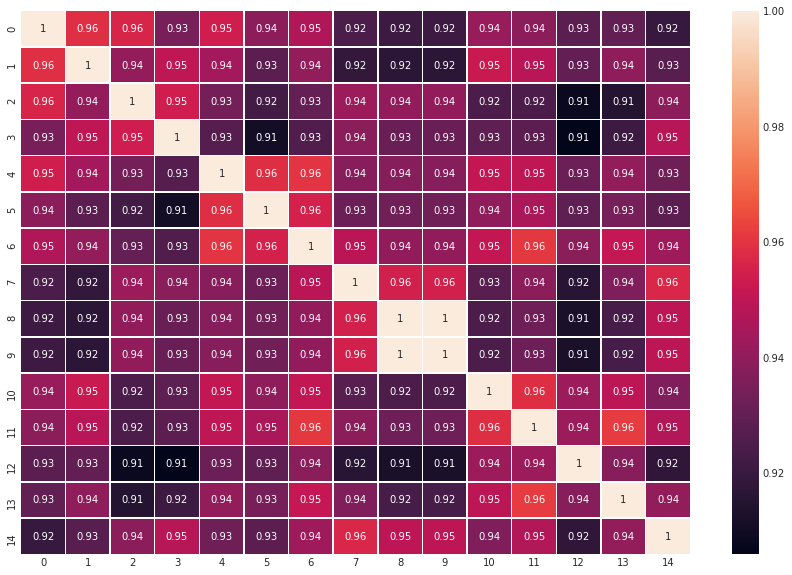

In [75]:
plt.rcParams['figure.figsize'] = (15,10)
indices = [1,2,4,7,8,10,11,13, 14] + list(range(14,20))
pprint(list(map(lambda x: "-".join([str(e) for e in x]), zip(range(len(indices)),[models[i] for i in indices]))))
sns.heatmap(results[indices][:,indices], annot=True,  linewidths=.5)

['0-e-fastText-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '1-e-glove-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '2-e-fastText-m-singlegru-o-loss-l-300-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '3-e-glove-m-singlegru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '4-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '5-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '6-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '7-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p',
 '8-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '9-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '10-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '11-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '12-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-F

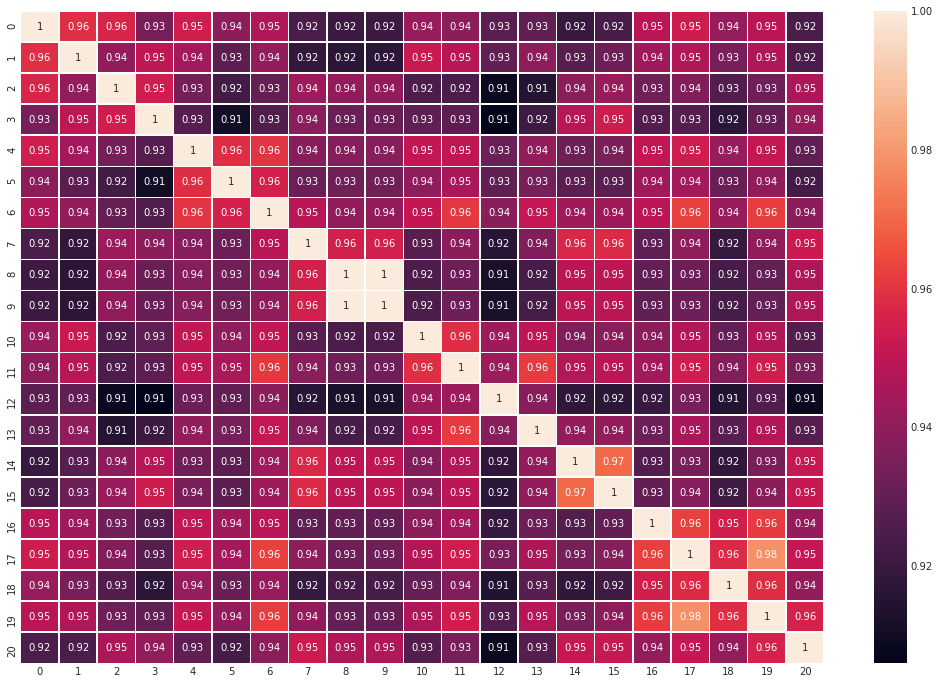

In [76]:
plt.rcParams['figure.figsize'] = (18,12)
indices = [1,2,4,7,8,10,11,13, 14] + list(range(14,26))
pprint(list(map(lambda x: "-".join([str(e) for e in x]), zip(range(len(indices)),[models[i] for i in indices]))))
sns.heatmap(results[indices][:,indices], annot=True,  linewidths=.5)

['0-e-fastText-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '1-e-glove-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '2-e-fastText-m-singlegru-o-loss-l-300-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '3-e-glove-m-singlegru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '4-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '5-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '6-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '7-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p',
 '8-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '9-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '10-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '11-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '12-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',

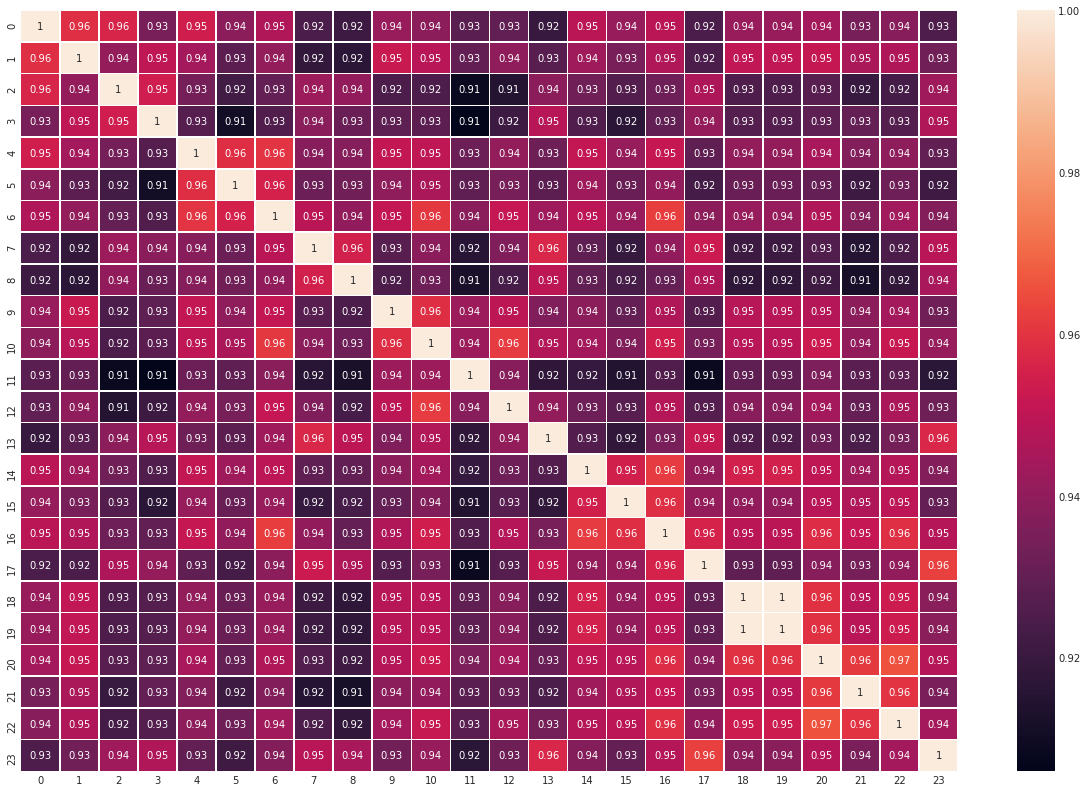

In [78]:
plt.rcParams['figure.figsize'] = (21,14)
indices = [1,2,4,7,8,10,11,13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26] + list(range(26,31))
pprint(list(map(lambda x: "-".join([str(e) for e in x]), zip(range(len(indices)),[models[i] for i in indices]))))
sns.heatmap(results[indices][:,indices], annot=True,  linewidths=.5)

['0-e-fastText-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '1-e-glove-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '2-e-fastText-m-singlegru-o-loss-l-300-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '3-e-glove-m-singlegru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '4-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '5-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '6-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '7-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p',
 '8-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '9-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '10-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '11-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '12-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',

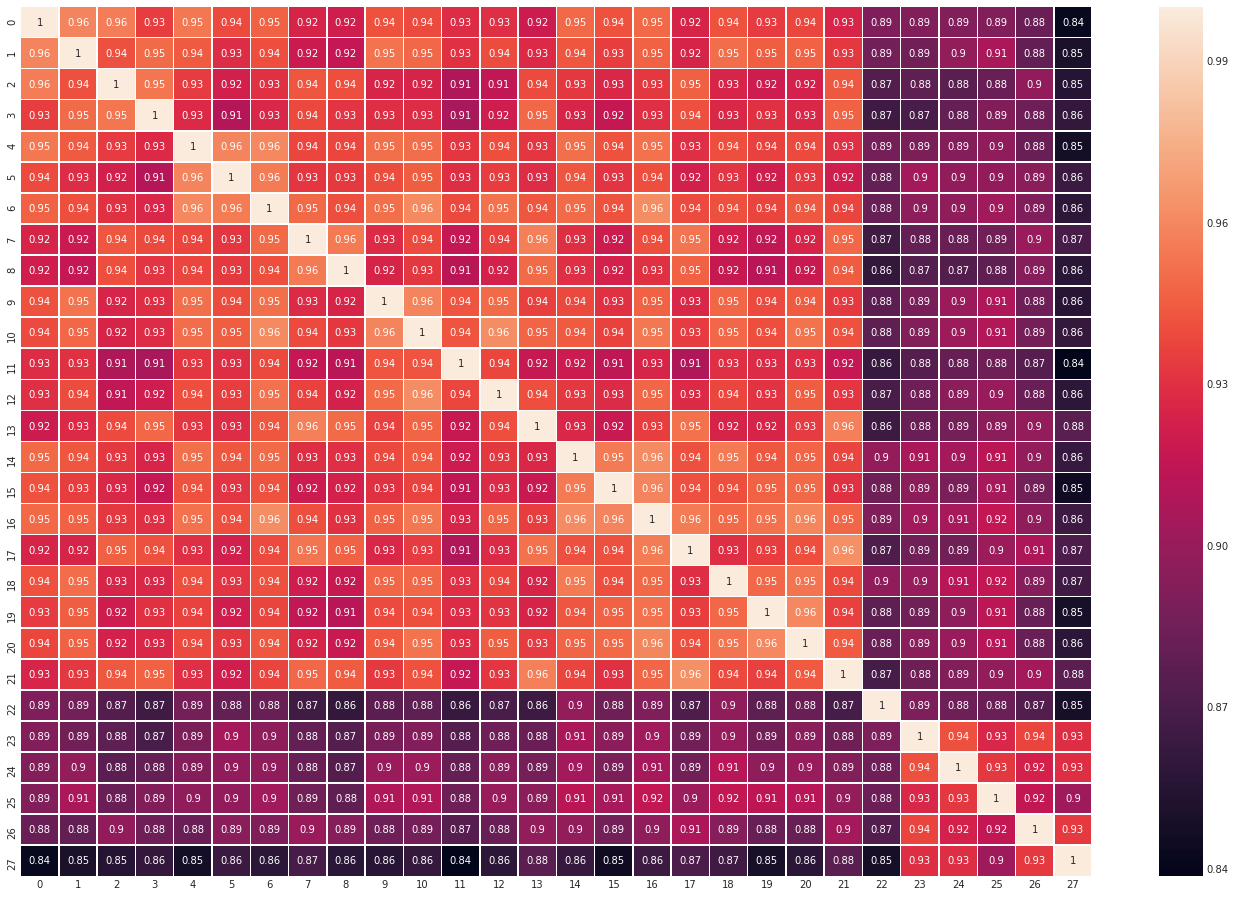

In [83]:
plt.rcParams['figure.figsize'] = (24,16)
indices = [1,2,4,7,8,10,11,13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 28, 29, 30] + list(range(31,37))
pprint(list(map(lambda x: "-".join([str(e) for e in x]), zip(range(len(indices)),[models[i] for i in indices]))))
sns.heatmap(results[indices][:,indices], annot=True,  linewidths=.5)

['0-e-fastText-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '1-e-glove-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '2-e-fastText-m-singlegru-o-loss-l-300-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '3-e-glove-m-singlegru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '4-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '5-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '6-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '7-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p',
 '8-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '9-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '10-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '11-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '12-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',

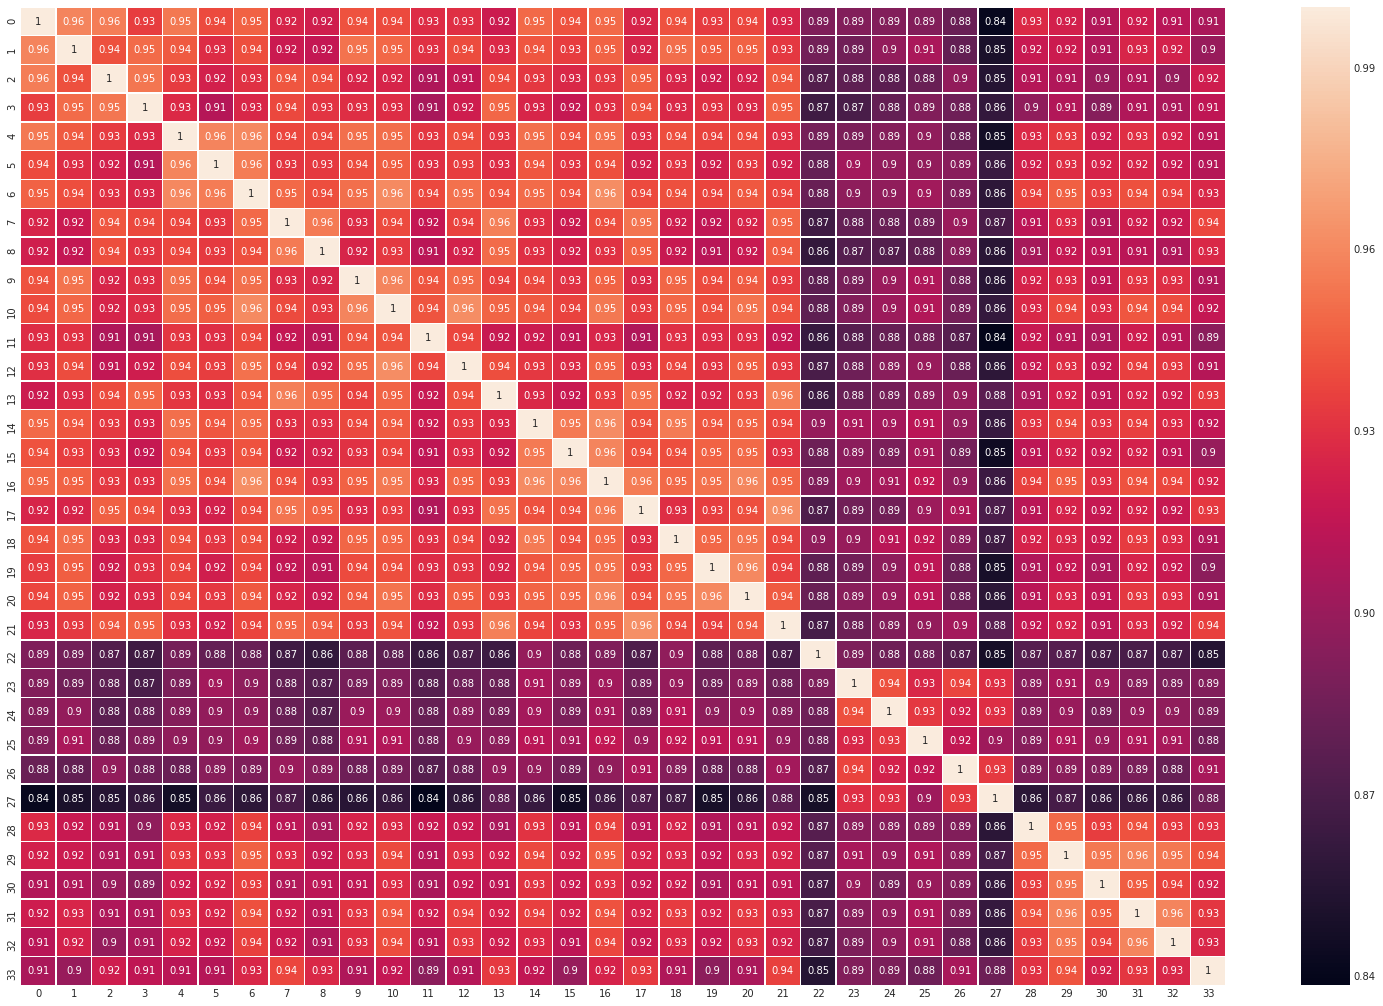

In [84]:
plt.rcParams['figure.figsize'] = (27,18)
indices = [1,2,4,7,8,10,11,13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 28, 29, 30] + list(range(31,43))
pprint(list(map(lambda x: "-".join([str(e) for e in x]), zip(range(len(indices)),[models[i] for i in indices]))))
sns.heatmap(results[indices][:,indices], annot=True,  linewidths=.5)

['0-e-fastText-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '1-e-glove-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '2-e-fastText-m-singlegru-o-loss-l-300-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '3-e-glove-m-singlegru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '4-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '5-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '6-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '7-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p',
 '8-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '9-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '10-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '11-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '12-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',

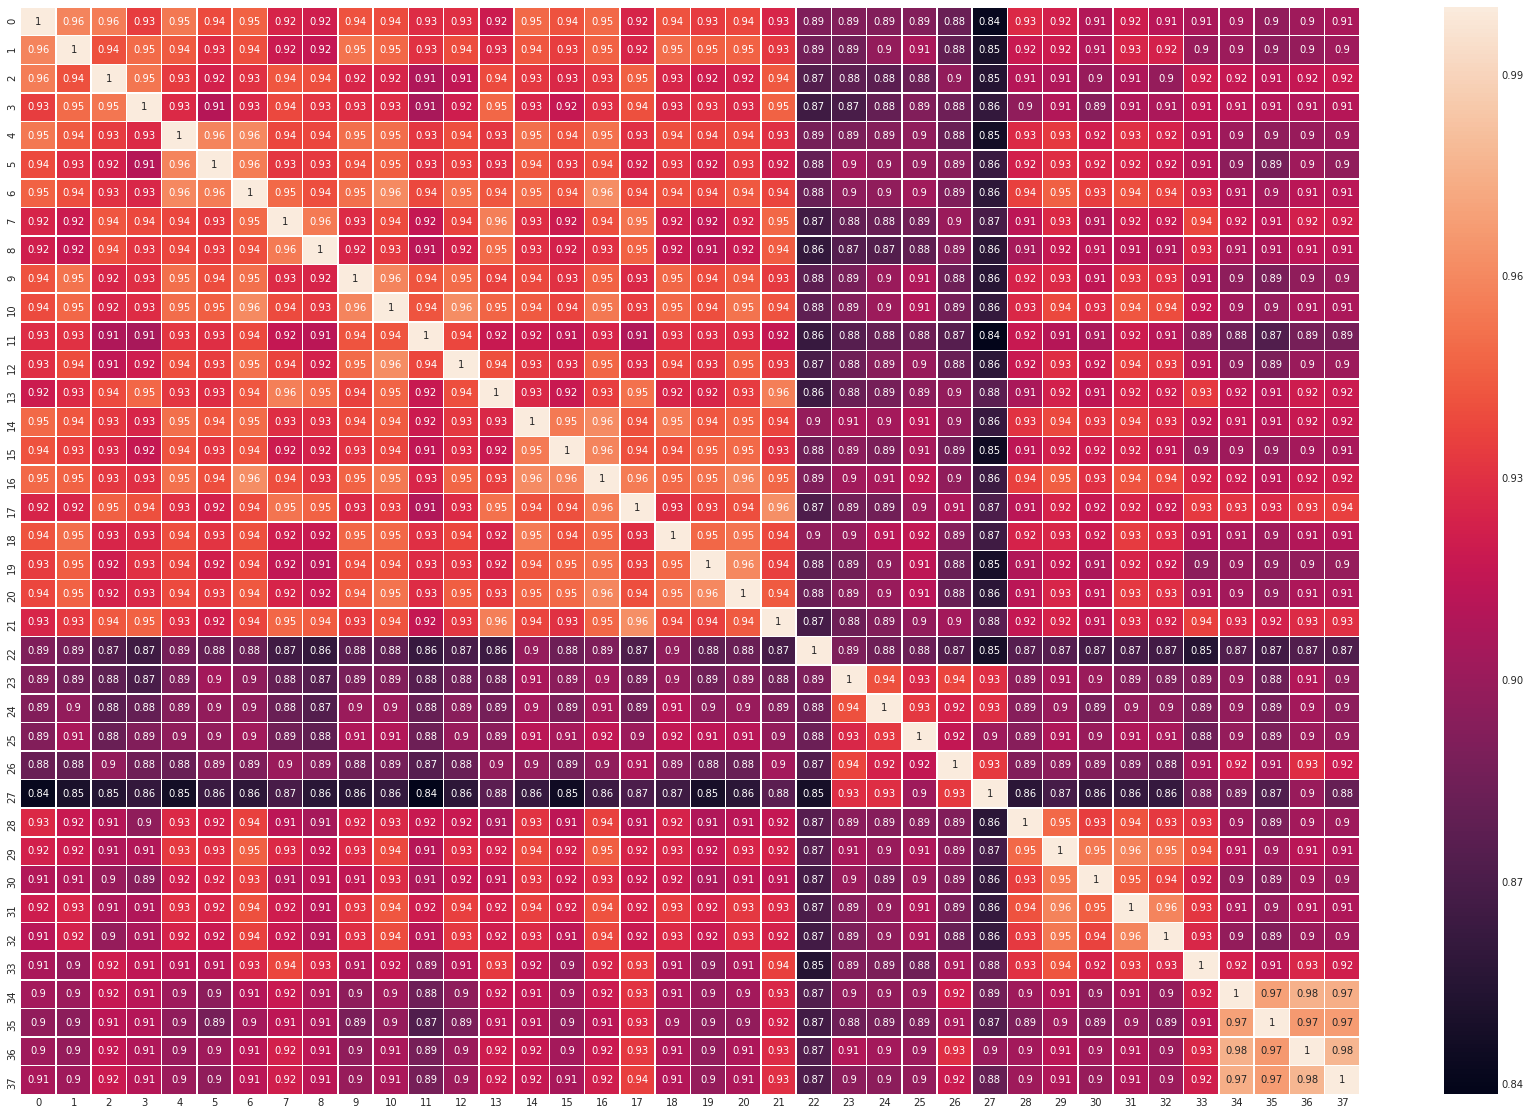

In [85]:
plt.rcParams['figure.figsize'] = (30,20)
indices = [1,2,4,7,8,10,11,13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 28, 29, 30] + list(range(31,47))
pprint(list(map(lambda x: "-".join([str(e) for e in x]), zip(range(len(indices)),[models[i] for i in indices]))))
sns.heatmap(results[indices][:,indices], annot=True,  linewidths=.5)

['0-e-fastText-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '1-e-glove-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '2-e-fastText-m-singlegru-o-loss-l-300-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '3-e-glove-m-singlegru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '4-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '5-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '6-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '7-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p',
 '8-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '9-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '10-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '11-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '12-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',

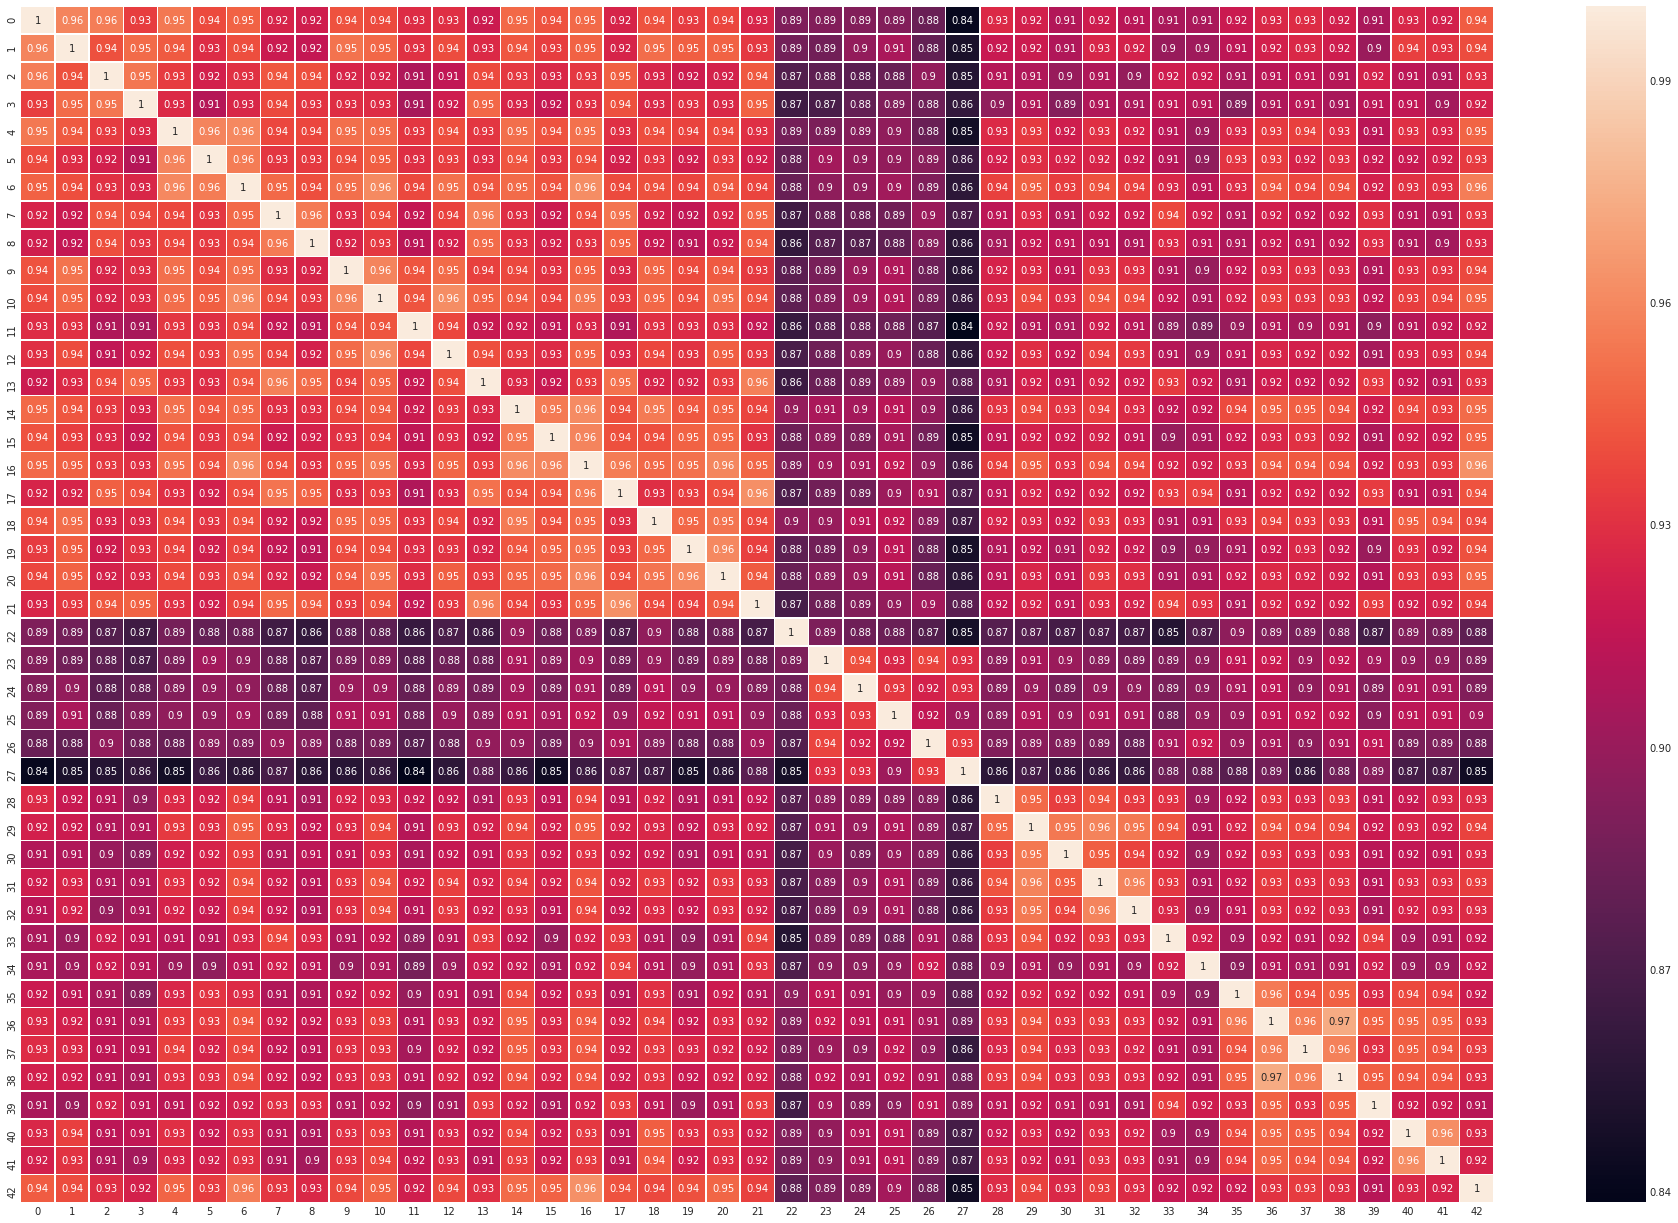

In [87]:
plt.rcParams['figure.figsize'] = (33,22)
indices = [1,2,4,7,8,10,11,13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 28, 29, 30] + list(range(31,43)) + [46] + list(range(47,55))
pprint(list(map(lambda x: "-".join([str(e) for e in x]), zip(range(len(indices)),[models[i] for i in indices]))))
sns.heatmap(results[indices][:,indices], annot=True,  linewidths=.5)

['0-e-fastText-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '1-e-glove-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '2-e-fastText-m-singlegru-o-loss-l-300-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '3-e-glove-m-singlegru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '4-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '5-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '6-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '7-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p',
 '8-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '9-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '10-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '11-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '12-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',

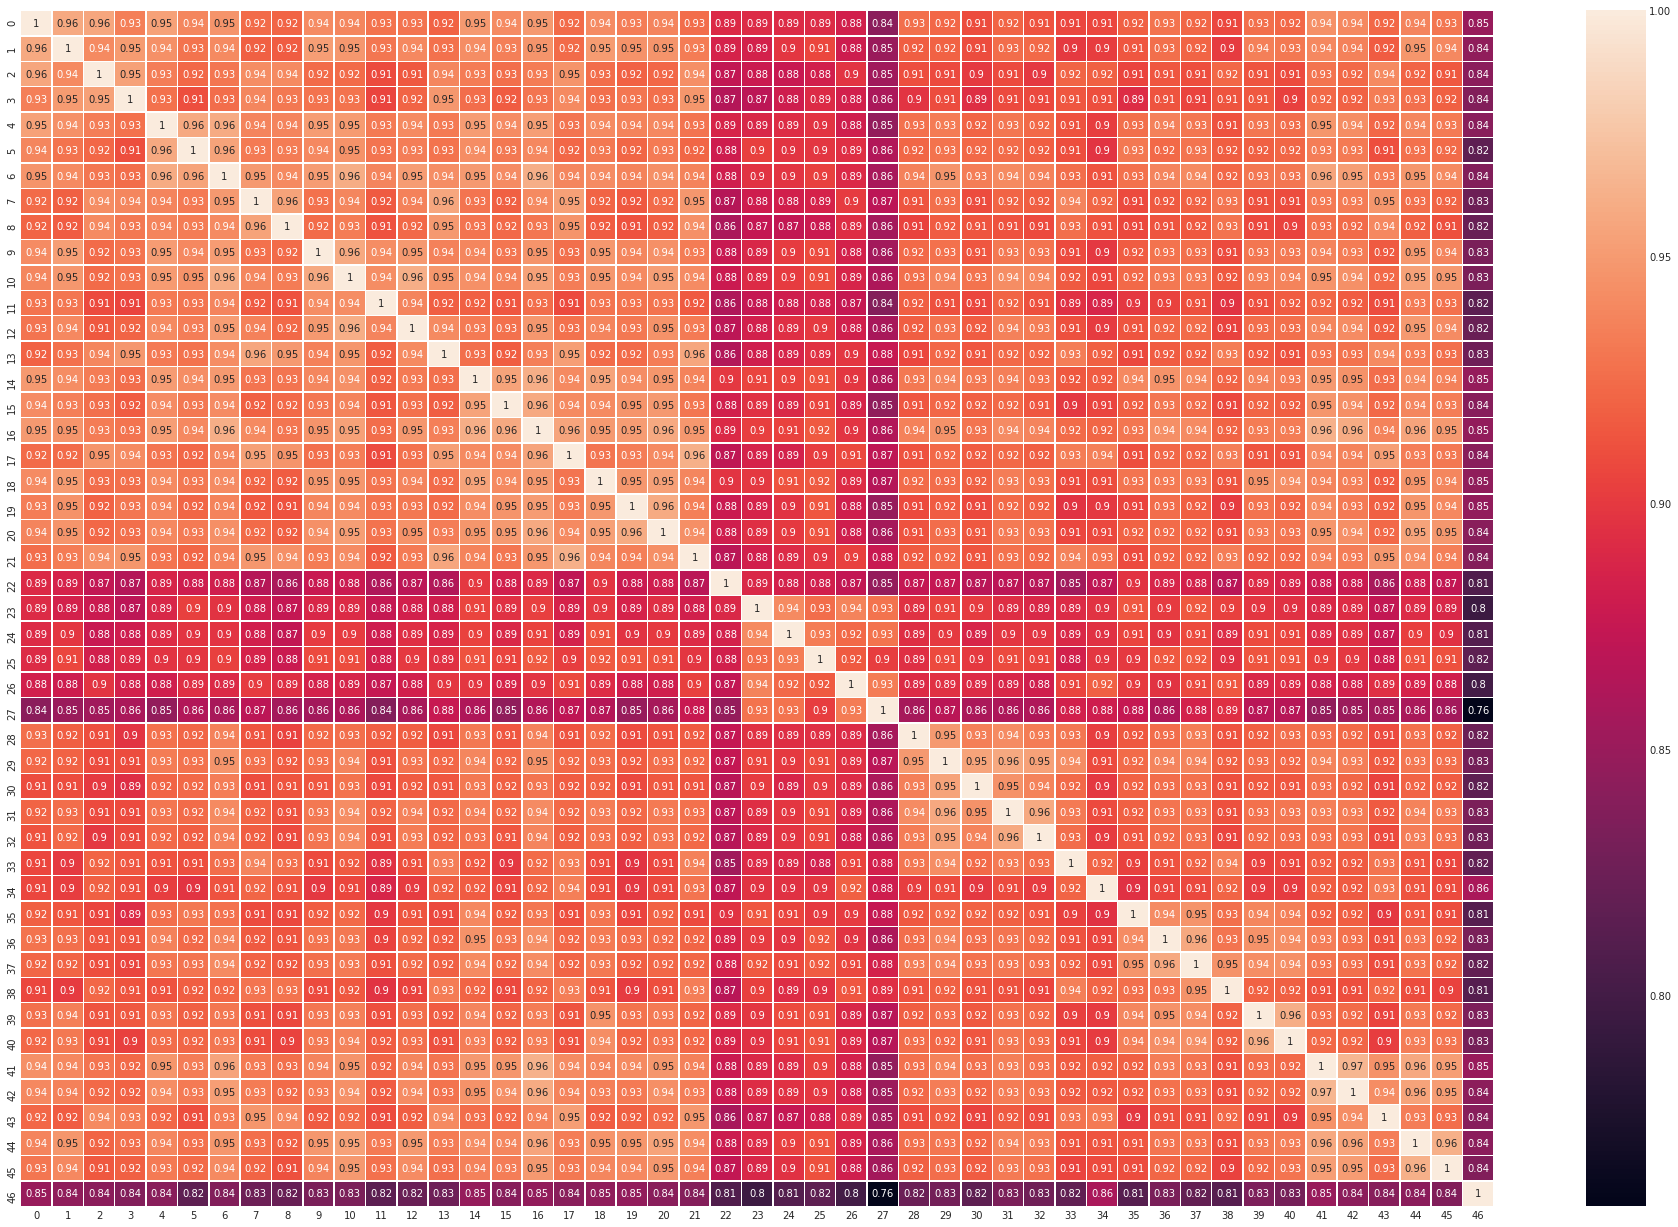

In [89]:
plt.rcParams['figure.figsize'] = (33,22)
indices = [1,2,4,7,8,10,11,13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 28, 29, 30] + list(range(31,43)) + [46,47] + list(range(49,60))
pprint(list(map(lambda x: "-".join([str(e) for e in x]), zip(range(len(indices)),[models[i] for i in indices]))))
sns.heatmap(results[indices][:,indices], annot=True,  linewidths=.5)

['0-e-fastText-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '1-e-glove-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '2-e-fastText-m-singlegru-o-loss-l-300-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '3-e-glove-m-singlegru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '4-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '5-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '6-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '7-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p',
 '8-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '9-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '10-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '11-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '12-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',

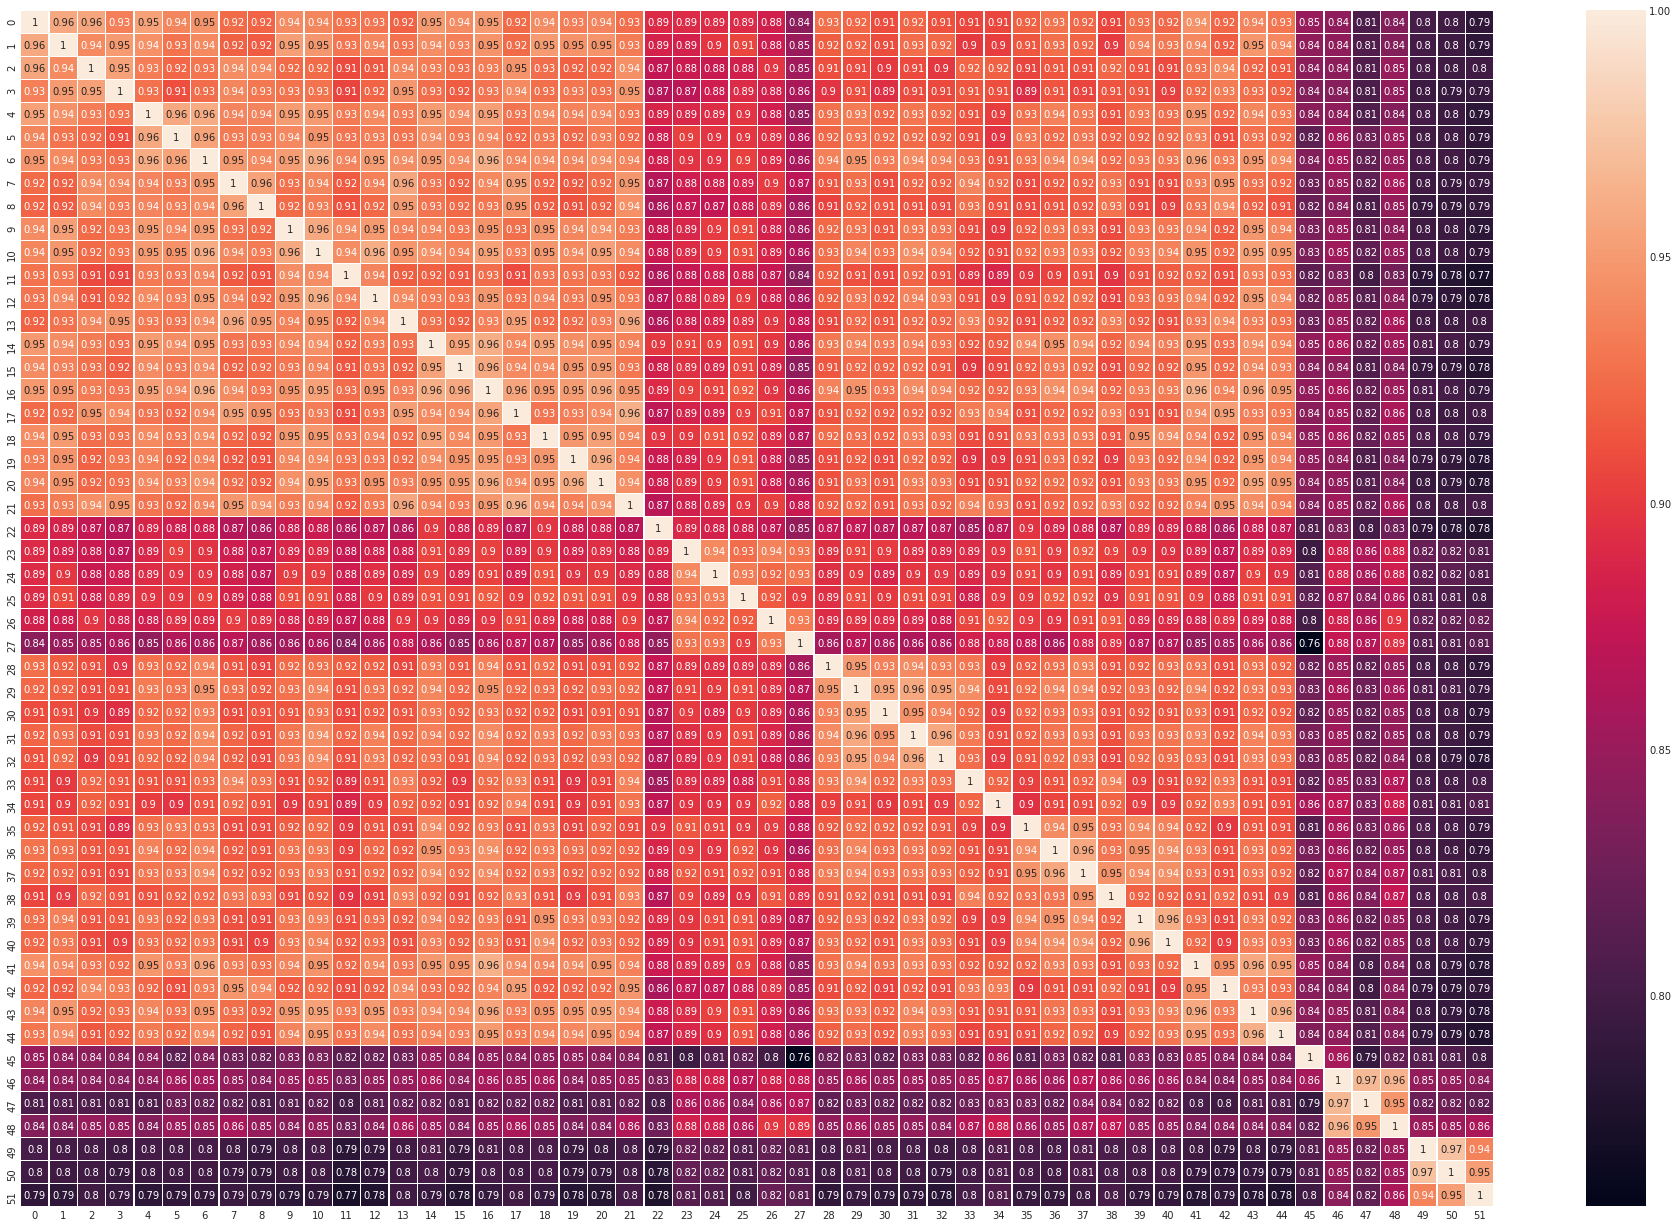

In [91]:
plt.rcParams['figure.figsize'] = (33,22)
indices = [1,2,4,7,8,10,11,13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 28, 29, 30] + list(range(31,43)) + [46,47] + list(range(49,55)) + list(range(56,66))
pprint(list(map(lambda x: "-".join([str(e) for e in x]), zip(range(len(indices)),[models[i] for i in indices]))))
sns.heatmap(results[indices][:,indices], annot=True,  linewidths=.5)

In [12]:
    models = [
        # |=============================================================================================================================================|
        # |--------------------------------------------model name--------------------|-public-lb-|--notes----|--stoping metric val--|--oof training auc-|
        # |+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
        # |--singlegru
        # "e-fastText-m-singlegru-o-loss-l-300-t-word_seq-a-False-k-5-d-0.5-ed-True"    #                         0.039862790185247826  0.9879125615838692| 0
          "e-fastText-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True"  #                         0.03977672309395772   0.9882893395645355|   1
        , "e-glove-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True"     #                         0.040115497633413405  0.9877813729816268|   2
        # , "e-glove-m-singlegru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True"     #                         0.04016299755467036   0.9880385597623101| 3
        , "e-fastText-m-singlegru-o-loss-l-300-t-word_seq-a-False-k-5-d-0.5-ed-True-p"# plb ??????128 gru cell  0.038780552141169385  0.9893600245500188|   4
        # , "e-fastText-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True-p"#           192 gru cell  0.0388370676189012    0.9895150849814781| 5
        # , "e-glove-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True-p"   # plb       168 gru cell  0.0391787786753918    0.9891835263092724| 6
        , "e-glove-m-singlegru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p"   #                         0.03892912565676921   0.9895949800478129|   7
        # |+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
        # |--dual recurrent--|--E-><SD>->BI(RNN, ret_seq=T)->D->BI(RNN, ret_seq=F)->D->Output--|--RMSprop-clip-decay--|---------------------------------|
        # |----------------------------------------------------------------fastText dual gru------------------------------------------------------------|
        , "e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False"  # plb 0.9839 64 gru cell   0.03878569178561746   0.9889575729884242|   8
        # , "e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True"   # plb 0.9851 64 gru cell   0.038426149918624766  0.9892561512475734| 9
        , "e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False"   # plb 0.???? 64 gru cell   0.98896186665513916   0.9882455342187026|   10
        # , "e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True"    # plb 0.???? 64 gru cell   0.989896769009636     0.9897833620504746| 11
        # , 'e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p' # plb 0.9859 64 gru cell   0.037253636088823046  0.990565966361271 | 12
        , "e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p"  # plb 0.9860 64 gru cell   0.9909905884776145    0.99070534142237  |   13
        , "e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p" #            168 gru cell  0.03842620880700849   0.9896792938436768|   14
        # |----------------------------------------------------------------glove dual gru---------------------------------------------------------------|
        , "e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False"     # plb 0.9841 64 gru cell   0.039255329267914064  0.9889373801289936|   15
        , "e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True"      # plb 0.9850 64 gru cell   0.0386557071181742    0.9893335772431743|   16
        , "e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False"      # plb 0.???? 128gru cell   0.989346108209169     0.9885367345919317|   17
        # , "e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True"       # plb 0.???? 128gru cell   0.9896206547636497    0.9892739761089372|   18
        , "e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True-p"     # plb 0.9856 64 gru cell   0.9908534271957794    0.990786235081304 |   19
        # , "e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True-p"    # plb ?????? 64 gru cell   0.03758970025111525   0.9906057030345216| 20
        # |----------------------------------------------------------------dual lstm--------------------------------------------------------------------|
        , "e-fastText-m-duallstm-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p"                          #0.03793221743193936   0.9896758622659704|   ??
        , "e-fastText-m-duallstm-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p"
        # |+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
        # |--recurrent with 1Dpooling--|--E-><SD>->BI(RNN, ret_seq=T)->SD->[GlobalMaxP, GlobalAvgP]->Output--|--RMSprop-clip-decay--|-------------------|
        # |---------------------------------------------------------------fastText lstmpool-------------------------------------------------------------|
        # , "e-fastText-m-lstmpool-o-loss-l-300-t-word_seq-a-False-k-5-d-0.2-ed-False" # plb 0.9845 64 lstm cell  0.03930044777911534   0.9892196083891868|   21
        # , "e-fastText-m-lstmpool-o-loss-l-300-t-word_seq-a-False-k-5-d-0.25-ed-True" # plb 0.9850 80 lstm cell  0.0384567785262458    0.989697557539166|  22
        # , "e-fastText-m-lstmpool-o-auc-l-300-t-word_seq-a-False-k-5-d-0.2-ed-False"  # plb 0.???? 128lstm cell  0.9895020119637422    0.9889997134668925|   23
        , "e-fastText-m-lstmpool-o-auc-l-300-t-word_seq-a-False-k-5-d-0.25-ed-True"  # plb 0.9852 128lstm cell  0.9900179920914309    0.9899768463714634|   24
        , "e-fastText-m-lstmpool-o-auc-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True-p" # plb 0.9856 128lstm cell  0.99104433784861      0.9909112194843065|   25
        # |--------------------------------------------------------------glove lstmpool-----------------------------------------------------------------|
        , "e-glove-m-lstmpool-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False"    # plb 0.9842 64 lstm cell  0.03948638144245002   0.9888600753905193|   26
        # , "e-glove-m-lstmpool-o-loss-l-400-t-word_seq-a-False-k-5-d-0.1-ed-True"     # plb 0.9851 80 lstm cell  0.03894103140855342   0.9892621091382511|   27
        , "e-glove-m-lstmpool-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False"     # plb 0.???? 128lstm cell  0.9893154523688711    0.9888904313544685|   28
        , "e-glove-m-lstmpool-o-auc-l-400-t-word_seq-a-False-k-5-d-0.1-ed-True"      # plb 0.???? 144lstm cell  0.9898719661439239    0.9894176054267639|   29
        # , "e-glove-m-lstmpool-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True-p"    # plb ?????? 64 lstm cell  0.9907883541308458    0.990685723964711 |   30
        # |+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
        # |--cnn with short cuts--|--E-><SD>->C(64)--(D)-->MaxP-->C(128)--(D)-->MaxP-->C(256)--(D)-->MaxP-->C(512)--(D)-->MaxP->GlobalMaxP-->Concat->Out|
        # |                                              ➘------------------ | ------------------ | ------------------ | ------>GlobalMaxP----➚        |
        # |                                                                    ➘----------------- | ------------------ | ------>GlobalMaxP----➚        |
        # |                                                                                         ➘----------------- | ------>GlobalMaxP----➚        |
        # |                                                                                                             ➘------>GlobalMaxP----➚        |
        , "e-fastText-m-1dcnn-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False"    # plb 0.9807               0.043188315885413046  0.9836396791711365|   31
        , "e-fastText-m-1dcnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.3-ed-False"     # plb 0.9830               0.988235068763563     0.988235068763563 |   32
        , "e-glove-m-1dcnn-o-auc-l-400-t-word_seq-a-False-k-5-d-0.3-ed-False"        # plb 0.98??               0.9877953425341282    0.9873732483607282|   33
        , "e-glove-m-1dcnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.2-ed-False"        # plb 0.9826               0.9878919343007058    0.9865766847964235|   34
        , "e-fastText-m-1dcnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.3-ed-False-p"   # plb 0.9840               0.9890789443415923    0.9884337987677146|   35
        , "e-glove-m-1dcnn-o-auc-l-400-t-word_seq-a-False-k-5-d-0.3-ed-True-p"       # plb ??????               0.9890360340313306    0.9888158140442164|   36
        # |+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
        # |--dpcnn--|--E-><SD>->2*C(64,3,1)-->Add-->MaxP(3,2)--?*|-->2*C(64,3,1)-->Add-->MaxP(3,2)-|--2*C(64,3,1)-->Add->GlobalMaxP-->D-->Out           |
        # |                     ➘-C(64,1,1)-➚                   |   ➘-C(64,1,1)-➚                |  ➘-C(64,1,1)-➚                                     |
        , "e-fastText-m-dpcnn-o-loss-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True"     # plb 0.9843 64*4          0.03949779248735451  0.98887277725645   |   37
        , "e-fastText-m-dpcnn-o-loss-l-300-t-word_seq-a-False-k-5-d-0.25-ed-True"    # plb 0.9849 64*7          0.03910091214805972  0.9892201906461567 |   38
        , "e-fastText-m-dpcnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.25-ed-True"     # plb 0.???? 64*7          0.9886991936560493   0.9881968321676555 |   39
        , "e-glove-m-dpcnn-o-loss-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True"        # plb ?????? 64*7          0.03951993416676983  0.989071832993667  |   40
        , "e-glove-m-dpcnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True"         # plb ?????? 64*7          0.9893404274471056   0.9892070903299696 |   41
        , "e-fastText-m-dpcnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.25-ed-True-p"   # plb 0.9856 64*7          0.9905350399300884   0.99010323970241   |   42
        # |+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
        # |--2dcnn text cnn--||
        # , "e-fastText-m-2dcnn-o-auc-l-200-t-word_seq-a-False-k-5-d-0.2-ed-True-p"    # plb ?????? 1235*64       0.9892923810297234    0.9892113114497559|   43
        # , "e-fastText-m-2dcnn-o-loss-l-200-t-word_seq-a-False-k-5-d-0.2-ed-True-p"   # plb ?????? 1235*108      0.04195351859079033   0.9886728396820114|   44
        # , "e-fastText-m-2dcnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True-p"    # plb 0.9836 1235*128      0.9896842258947609    0.9894773948405491|   45
        , "e-fastText-m-2dcnn-o-loss-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True-p"   # plb ?????? 1235*128      0.04151419463192054   0.9895238687223418|   46
        # |+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
        # |--2dcnn followed by recurrent--|--E-><SD>->2DC(48)--Permute(1,3,2)--Reshape(1,2*3)-->BI(RNN, ret_seq=T)-->GlobalMaxP--(D)-->-Out-------------|
        , "e-fastText-m-crnn-o-loss-l-300-t-word_seq-a-False-k-5-d-0.2-ed-False"     # plb 0.9835 48cnn64gru64d 0.040599631776867345  0.9881060338118592|   47
        # , "e-fastText-m-crnn-o-loss-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True"      # plb 0.???? 48cnn64gru64d 0.04090893583529383   0.9886722151437634|   48
        , "e-fastText-m-crnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.2-ed-False"      # plb 0.???? 48cnn64gru64d 0.9885823617709907    0.9880485945409619|   49
        , "e-fastText-m-crnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True"       # plb 0.???? 48cnn64gru64d 0.9889102087806986    0.9887448404077158|   50
        , "e-fastText-m-crnn-o-auc-l-300-t-word_seq-a-False-k-5-d-0.2-ed-True-p"     # plb 0.9844 48cnn64gru64d 0.9895966796034743    0.9892859392066509|   51
        # , "e-fastText-m-crnn-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False"   # plb 0.9835 48cnn64gru64d 0.040306914708962464  0.9880926706452219|   52
        # , "e-glove-m-crnn-o-loss-l-300-t-word_seq-a-False-k-5-d-0.2-ed-False"        # plb 0.9825 48cnn64gru64d 0.0409410269935218    0.9878149085979498|   53
        , "e-glove-m-crnn-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False"        # plb 0.9830 48cnn64gru64d 0.04093623951785437   0.9880453818195581|   54
        # |------------------------------------------------------------recurrent -> 1dcnn---------------------------------------------------------------|
        # , "e-fastText-m-grucnn-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True"    # plb 0.9851 128gru64cnn   0.03864121738531204   0.9897427879461199|   55
        , "e-fastText-m-grucnn-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True"     # plb 0.9851 128gru64cnn   0.9899513978200888    0.9898509582516019|   56
        , "e-fastText-m-grucnn-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True-p"   # plb 0.9854 128gru64cnn   0.990962358881309     0.9906737103012322|   57
        , "e-glove-m-grucnn-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True"       # plb 0.9849 128gru64cnn   0.039208610008177366  0.9894670109261301|   58
        # , "e-glove-m-grucnn-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True"        # plb 0.???? 128gru64cnn   0.9896636145444774    0.9894648692173084|   59
        # |--------------------------------------------------------------tfidf log reg------------------------------------------------------------------|
        # , "log_reg-w-30000-2-c-150000-5-C-3.0-k-5"                                   # plb 0.9772                                                     |
        , "log_reg-w-None-3-c-None-6-C-4-k-5"                                        # plb 0.9778                                     0.9858867069016608|   60
        # , "log_reg-w-None-3-c-None-6-C--1-k-5"                                       # plb 0.9786                                     0.9864928430756239|   61
        # , "log_reg-w-25000-2-c-60000-3-C--1.0-k-5"                                   # plb 0.9774                                     0.9854785796730031|   62
        , "log_reg-w-None-3-c-None-6-C--1.0-k-5-p"                                   # plb 0.9803                                     0.9870013986995876|   63
        # , "nb_svm-w-None-3-c-None-6-C-4-k-5"                                         # plb 0.9705 bad                                                 |
        # |-----------------------------------------------------------------fm-ftrl---------------------------------------------------------------------|
        # , "fm_ftrl-w-20000-3-c-50000-6"                                              # plb 0.9796                                     0.981068          |   64
        , "fm_ftrl-w-20000-2-c-50000-3"                                              # plb 0.9805                                     0.981923          |   65
        , "fm_ftrl-w-300000-2-c-60000-3-p"                                           # plb                                            0.981963+0.000888 |   66
        # |=============================================================================================================================================|
        ]


In [13]:
results = np.zeros((len(models), len(models)))
for i in range(len(models) - 1):
    print(i)
    for j in range(i+1, len(models)):
#         print(i, j)
        try:
            results[i, j] = corr(models[i],models[j])
        except:
            print("not possible")
results += results.T
for i in range(results.shape[0]):
    results[i,i] = 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


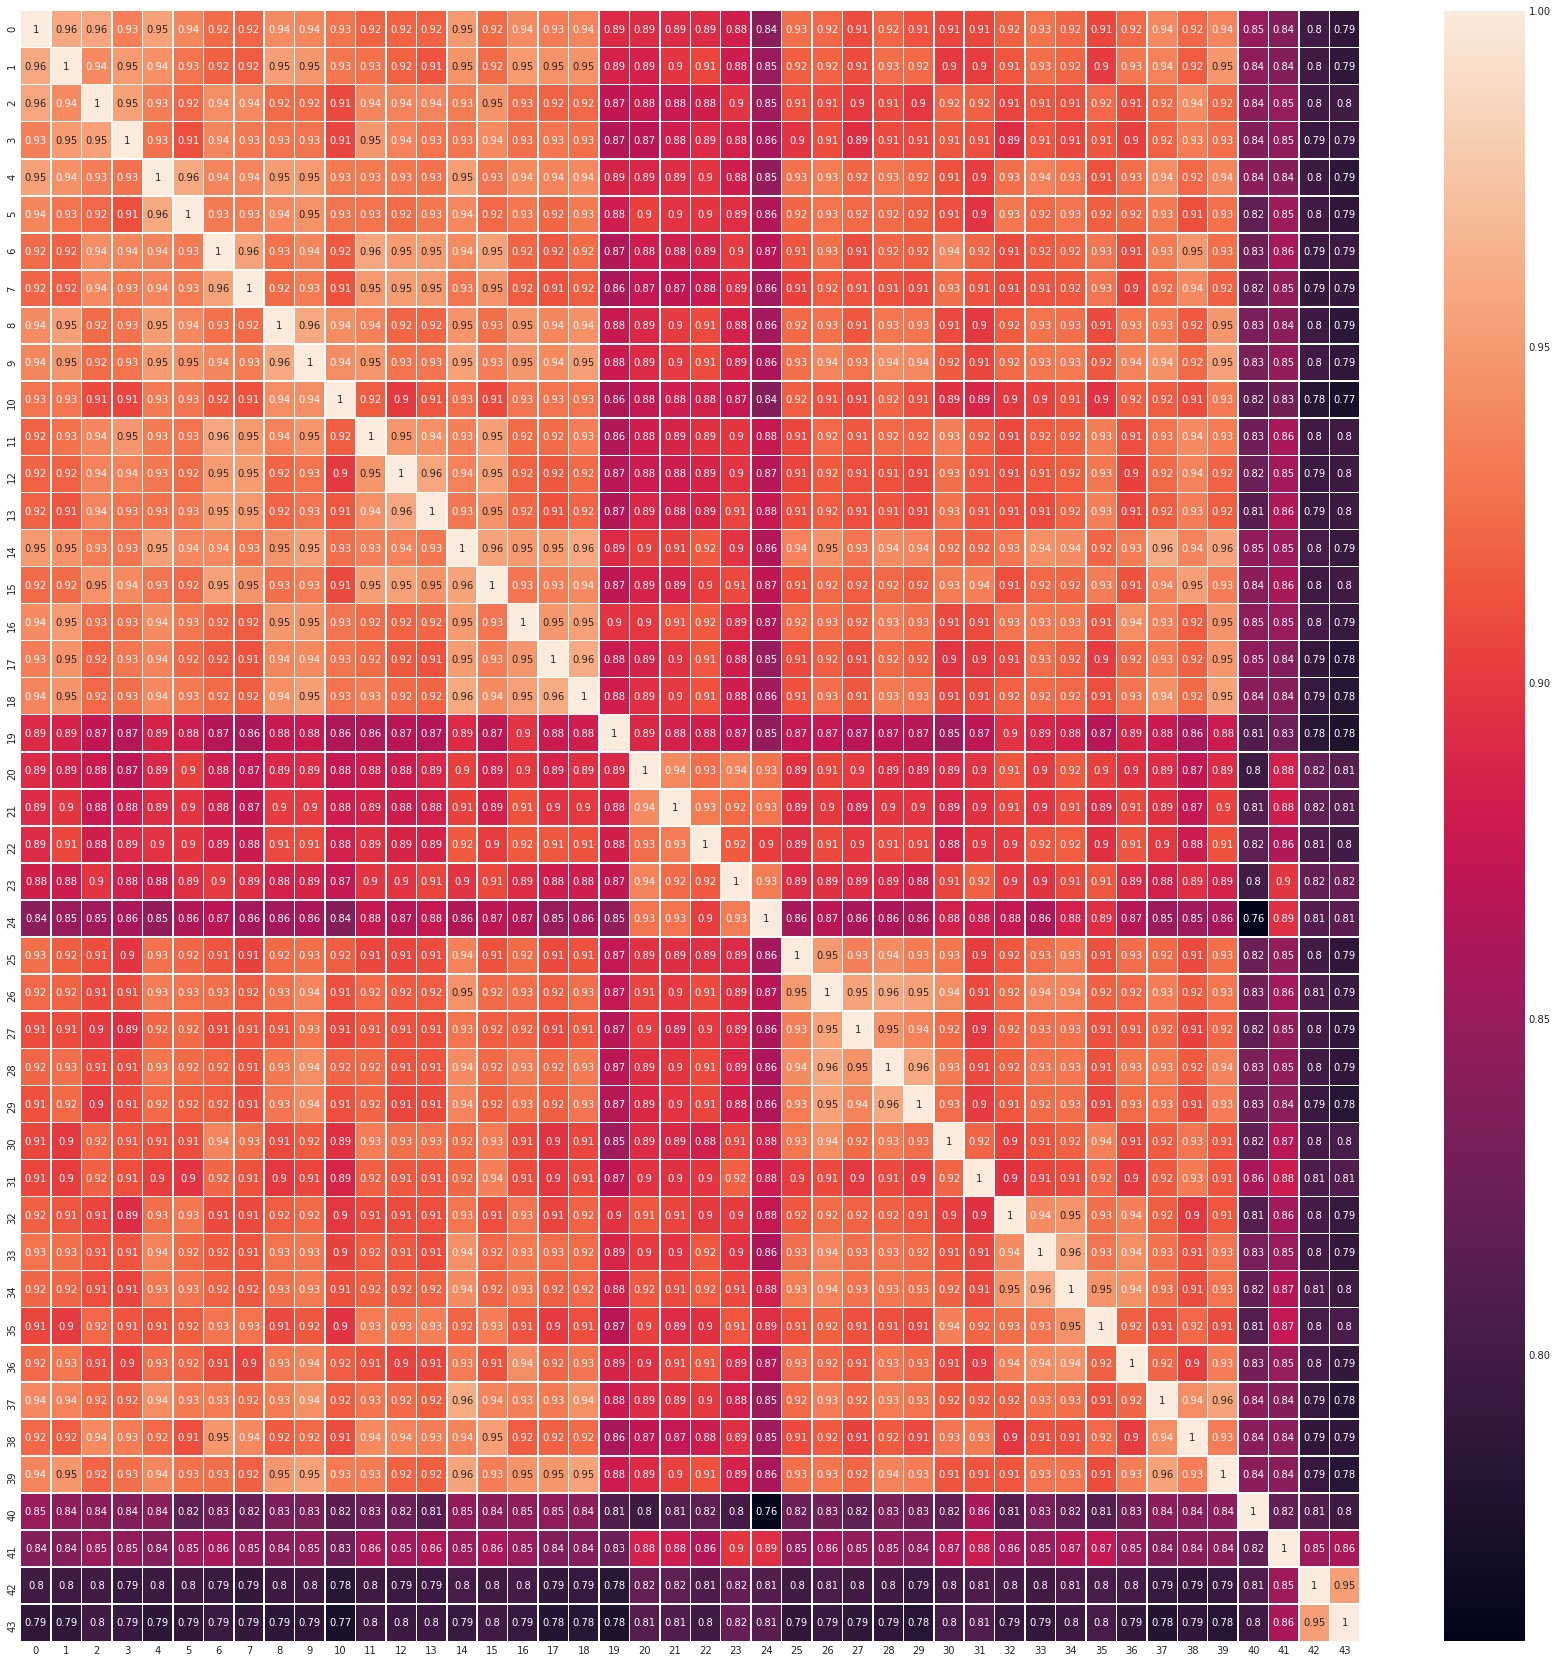

In [14]:
plt.rcParams['figure.figsize'] = (30,30)
sns.heatmap(results, annot=True,  linewidths=.5)

['0-e-fastText-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '1-e-glove-m-singlegru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.5-ed-True',
 '2-e-fastText-m-singlegru-o-loss-l-300-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '3-e-glove-m-singlegru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '4-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '5-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '6-e-fastText-m-dualgru-o-auc-l-500-t-word_seq-a-False-k-5-d-0.2-ed-True-p',
 '7-e-fastText-m-dualgru-o-loss-l-500-t-word_seq-a-False-k-5-d-0.5-ed-True-p',
 '8-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '9-e-glove-m-dualgru-o-loss-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True',
 '10-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-False',
 '11-e-glove-m-dualgru-o-auc-l-400-t-word_seq-a-False-k-5-d-0.2-ed-True-p',
 '12-e-fastText-m-duallstm-o-loss-l-500-t-word_seq-a-False-k-5-d-0.2-ed-Tr

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

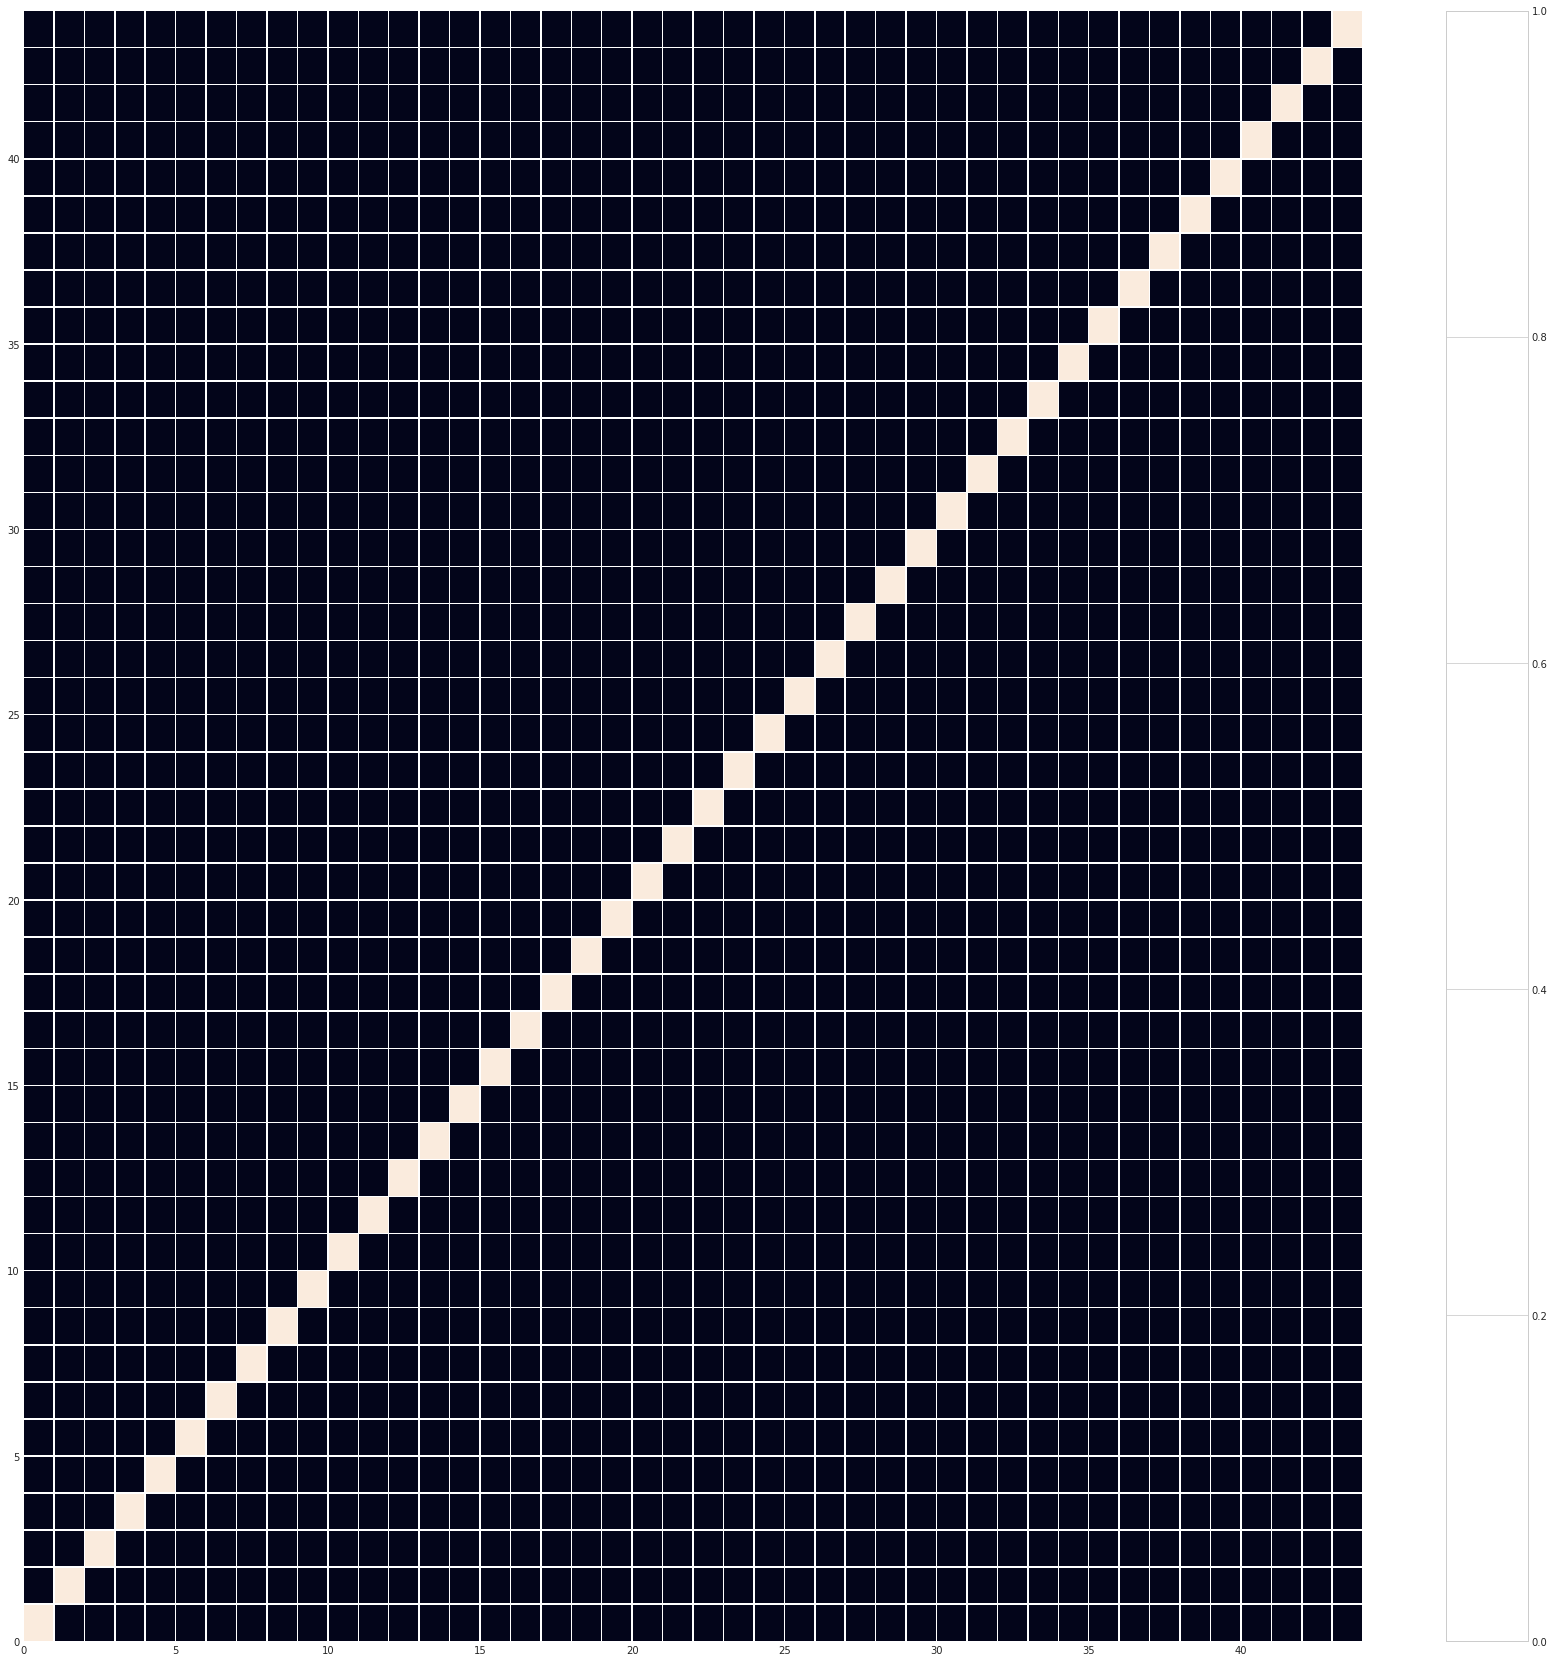

In [15]:
pprint(list(map(lambda x: "-".join([str(e) for e in x]), zip(range(results.shape[0]),[models[i] for i in range(results.shape[0])]))))
sns.heatmap(results > 0.96, annot=True,  linewidths=.5)

In [100]:
results.shape

(50, 50)

In [2]:
models = [
        "layer2/lgb-model_bench-0",                                                 # 0.9871
        "layer2/lgb-de_corred_models-0",                                            # 0.9871
        "layer2/lgb-all_models-0",                                                  # 0.9871
        "layer2/lr-de_corred_models-0",                                             # 0.9860
        "layer2/xgb-all_models-0",                                                  # 0.9872
    ]


In [3]:
results = np.zeros((len(models), len(models)))
for i in range(len(models) - 1):
    print(i)
    for j in range(i+1, len(models)):
#         print(i, j)
        try:
            results[i, j] = corr(models[i],models[j])
        except:
            print("not possible")
results += results.T
for i in range(results.shape[0]):
    results[i,i] = 1

0
1
2
3


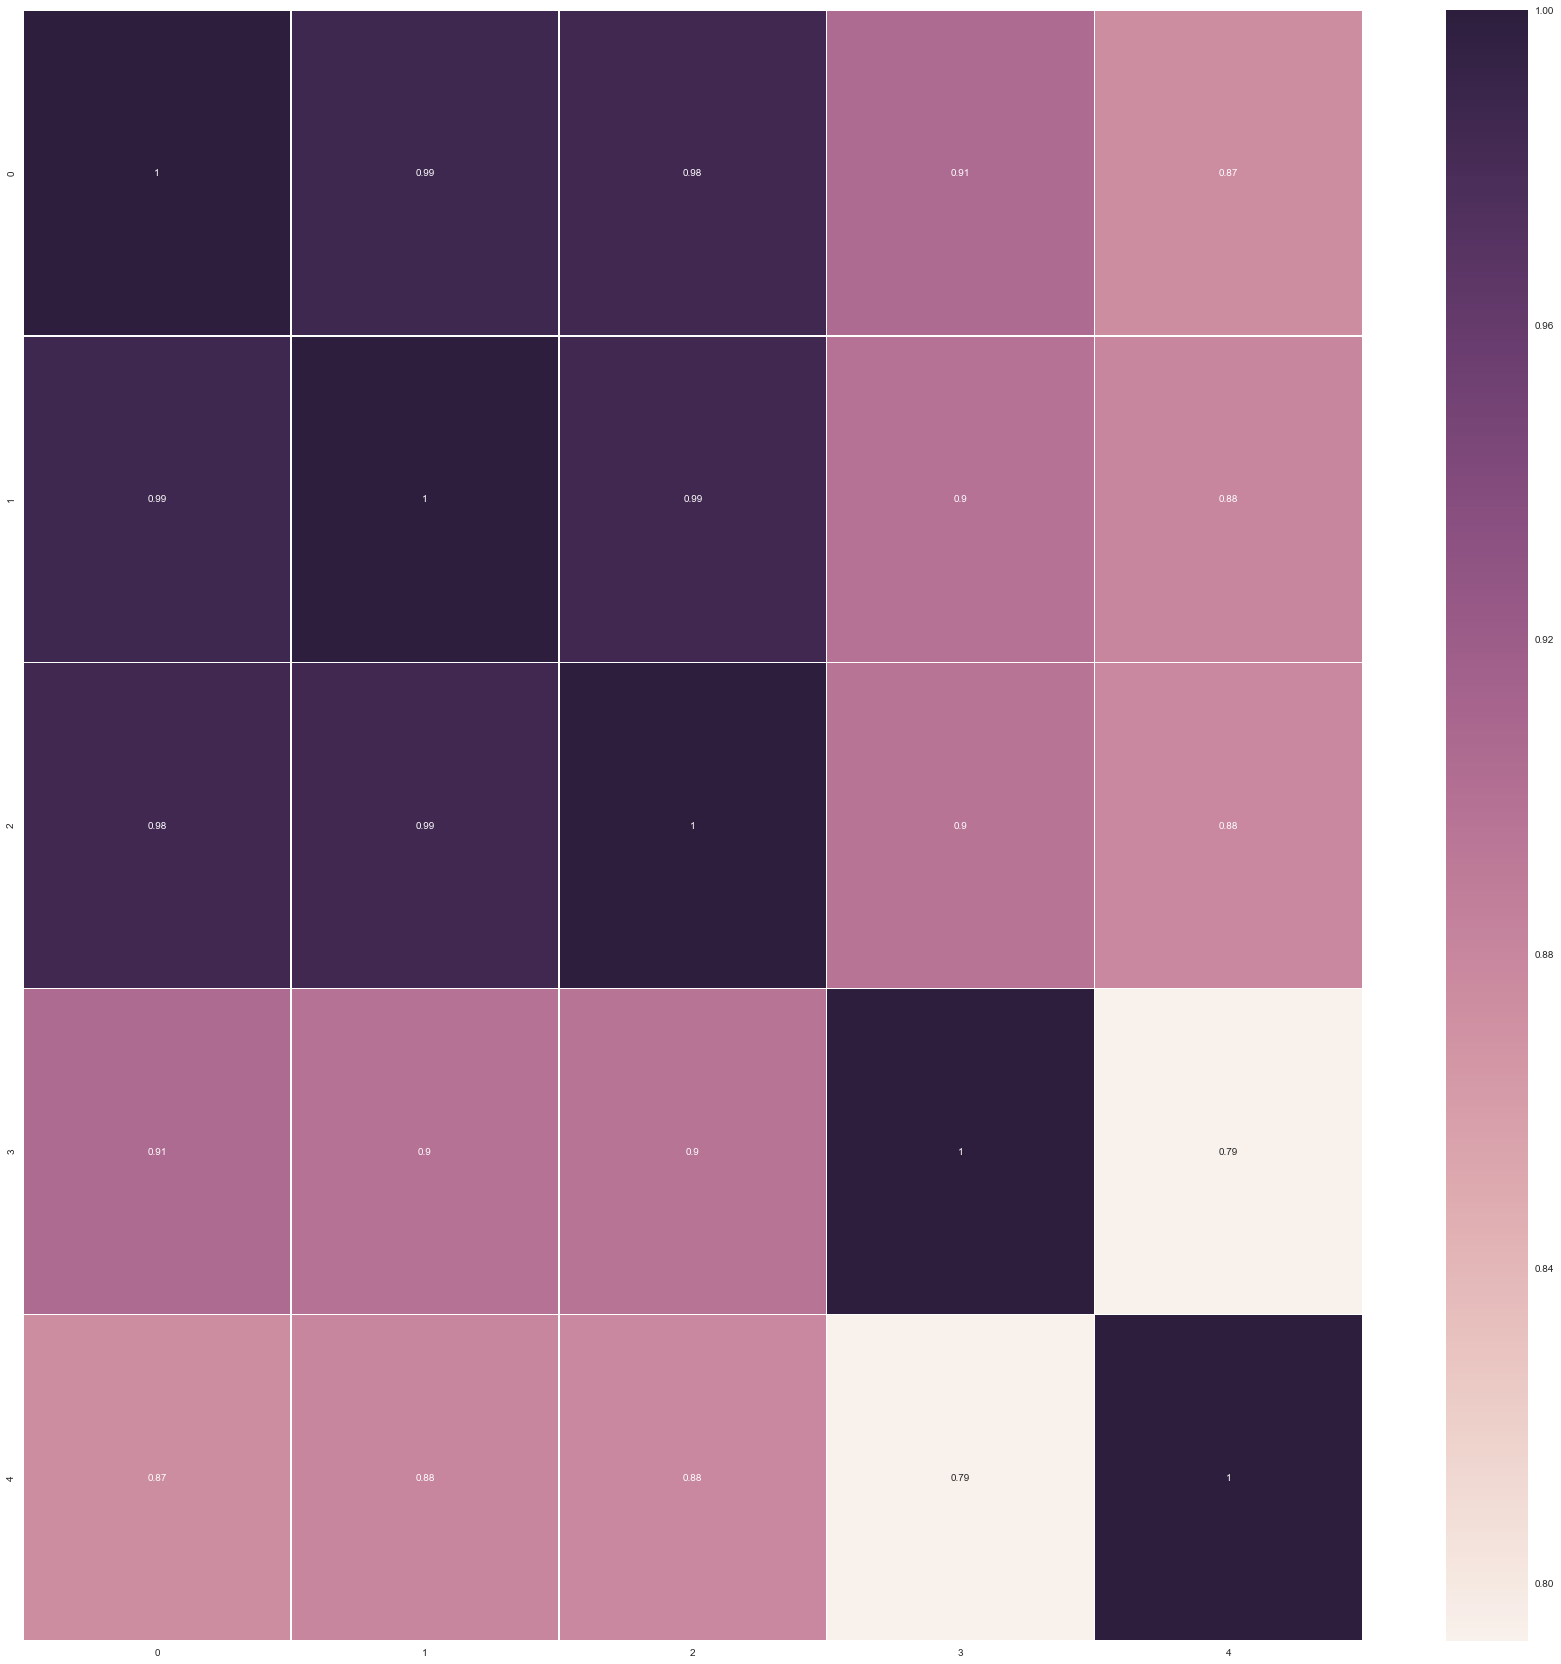

In [4]:
plt.rcParams['figure.figsize'] = (30,30)
sns.heatmap(results, annot=True,  linewidths=.5)